1. Charger les datasets

In [5]:
import pandas as pd

# Load the provided datasets
train_path = 'datasets/sign_mnist_train.csv'
test_path = 'datasets/sign_mnist_test.csv'

# Load datasets into pandas DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the train and test datasets
train_data.head(), test_data.head()


(   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  
 0       206   

2. Extraction des labels et des images

In [6]:
# Extraire les labels des datasets
train_labels = train_data['label'].values
test_labels = test_data['label'].values

# Extraire les données de pixels (en supprimant la colonne "label")
train_images = train_data.drop(columns=['label']).values
test_images = test_data.drop(columns=['label']).values

# Afficher la forme des données pour vérification (optionnel)
print(train_images.shape)  # Devrait afficher (27455, 784)
print(test_images.shape)   # Devrait afficher (7172, 784)


(27455, 784)
(7172, 784)


3. Transformation en matrices 28x28 et ajout du canal

In [7]:
# Transformation des vecteurs de pixels en images 28x28 avec 1 canal (niveaux de gris)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Afficher la forme des images après transformation
print(train_images.shape)  # (27455, 28, 28, 1)
print(test_images.shape)   # (7172, 28, 28, 1)


(27455, 28, 28, 1)
(7172, 28, 28, 1)


4. Normalisation des images

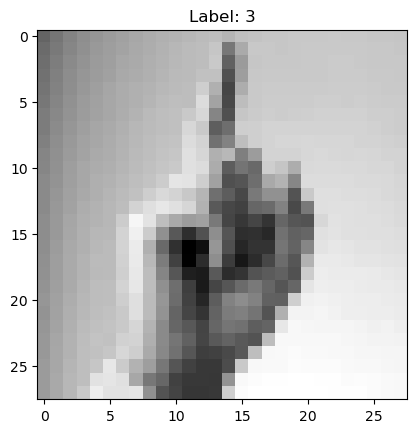

In [8]:
# Normalisation des images pour que les pixels soient entre 0 et 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Vérification rapide de la première image normalisée (optionnel)
import matplotlib.pyplot as plt

plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


5. Vérification des distributions des labels (optionnel)

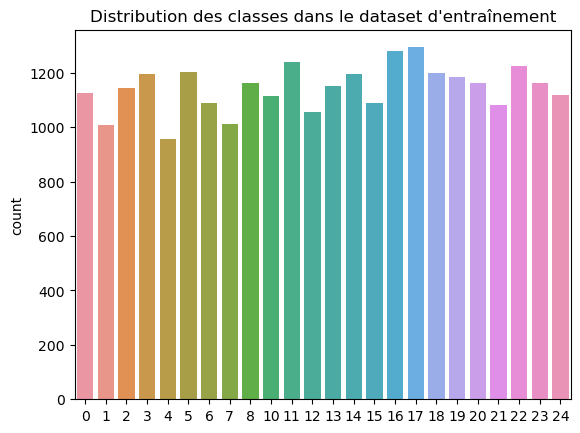

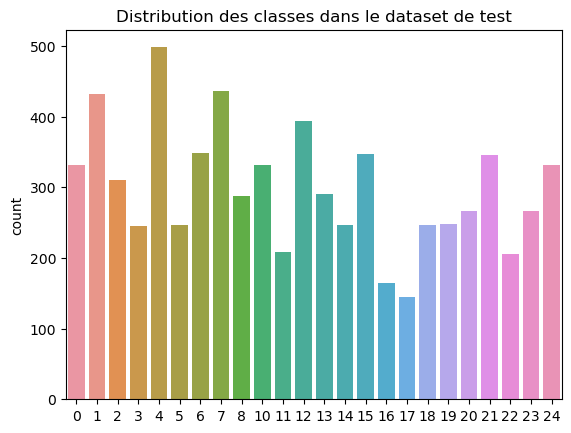

In [9]:
# Vérifier la distribution des classes dans le dataset d'entraînement
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_labels)
plt.title('Distribution des classes dans le dataset d\'entraînement')
plt.show()

sns.countplot(x=test_labels)
plt.title('Distribution des classes dans le dataset de test')
plt.show()


- Le dataset d'entraînement semble relativement bien équilibré avec des classes ayant un nombre d'exemples proches.
- Dans le dataset de test, certaines classes sont plus représentées que d'autres, mais cela ne semble pas être un déséquilibre drastique.

Partie 2 : Le dataset est-il équilibré ? Faut-il rééquilibrer les données ?
1. Évaluation de l'équilibre des données :
Sur la base des graphiques de distribution que vous avez générés :

Dataset d'entraînement : La distribution des classes est relativement équilibrée. Le nombre d'exemples par classe varie entre environ 1 000 et 1 300, ce qui signifie qu'il n'y a pas de classes massivement sous-représentées. Cela suggère que le dataset d'entraînement est suffisamment équilibré pour un modèle de classification sans nécessiter de rééquilibrage.

Dataset de test : Il y a quelques classes qui semblent être sous-représentées dans les données de test (comme les classes 16 et 17), tandis que d'autres classes sont mieux représentées. Cependant, le dataset de test est principalement utilisé pour évaluer le modèle, donc il est moins crucial de rééquilibrer ce dataset. L'important est d'avoir un échantillon représentatif pour tester les performances du modèle.

2. Faut-il rééquilibrer les données ?
Dans le cas du dataset d'entraînement, bien qu'il existe de légères différences dans la représentation des classes, cela ne semble pas nécessiter de rééquilibrage strict. Les modèles de réseaux de neurones, en particulier les réseaux convolutifs (CNN), sont généralement capables de gérer de petites différences dans la distribution des classes, surtout quand ces différences ne sont pas trop marquées.

Dans le cas du dataset de test, il n'est pas nécessaire de rééquilibrer, car ce dataset est utilisé uniquement pour évaluer la performance du modèle. Un léger déséquilibre ne devrait pas affecter significativement les résultats.

3. Rééquilibrer les données si nécessaire :
Si vous deviez tout de même vouloir rééquilibrer les données d'entraînement (par exemple, si vous constatez des performances inégales lors de l'entraînement), voici deux approches possibles :

Sur-échantillonnage des classes minoritaires : Créer des copies supplémentaires des exemples de classes sous-représentées afin d'augmenter leur poids dans l'entraînement.

Sous-échantillonnage des classes majoritaires : Réduire le nombre d'exemples des classes sur-représentées.

Explication du modèle :
- Couches de convolution (Conv2D) : Ces couches extraient des caractéristiques des images en appliquant des filtres sur les pixels voisins.
- Pooling (MaxPooling2D) : Réduit la dimensionnalité en prenant les valeurs maximales dans une zone donnée (souvent 2x2), ce qui aide à réduire la complexité et éviter l'overfitting.
- Dropout : Cette couche aide à éviter l'overfitting en désactivant aléatoirement des neurones lors de l'entraînement, ce qui encourage le réseau à ne pas trop dépendre de certaines connexions.
- Couches entièrement connectées (Dense) : Elles prennent les caractéristiques extraites par les couches précédentes et effectuent la classification finale.
- Fonction d'activation : On utilise la fonction d'activation ReLU dans les couches cachées et softmax pour la couche de sortie, qui est adaptée à la classification multi-classes.

In [10]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.6 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 7.2 MB/s eta 0:00:00:

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Définir la structure du modèle CNN
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(25, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,825 (518.85 KB)

 Trainable params: 132,825 (518.85 KB)

 Non-trainable params: 0 (0.00 B)

Explication détaillée du code :
Conv2D :

Première couche avec 32 filtres de taille 3x3 et fonction d'activation relu (Rectified Linear Unit) qui introduit de la non-linéarité dans le réseau.
La taille d'entrée est définie comme (28, 28, 1) car les images sont en 28x28 pixels et en niveaux de gris (un seul canal).
MaxPooling2D :

Applique un pooling 2x2 pour réduire la taille des caractéristiques tout en conservant les informations les plus importantes.
Conv2D (2e et 3e couches) :

Des couches supplémentaires de convolution avec 64 filtres. Elles permettent d'extraire des caractéristiques plus complexes.
Flatten :

Cette couche aplatit les caractéristiques 2D en un vecteur 1D afin de pouvoir les passer à des couches entièrement connectées.
Dense :

Une première couche dense avec 128 neurones et activation ReLU pour combiner les caractéristiques extraites.
Une deuxième couche dense avec 25 neurones (car il y a 25 classes à prédire) et activation softmax pour obtenir une probabilité pour chaque classe.
Dropout :

Utilisé avec un taux de 50% pour désactiver aléatoirement la moitié des neurones pendant l'entraînement, ce qui aide à éviter l'overfitting.
Compiling the Model :

Le modèle est compilé avec l'optimiseur adam, une fonction de perte sparse_categorical_crossentropy (adaptée aux labels qui ne sont pas one-hot encodés), et on mesure l'accuracy pour évaluer la performance.

In [12]:
# Entraînement du modèle
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.3058 - loss: 2.2662 - val_accuracy: 0.8466 - val_loss: 0.4761
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8577 - loss: 0.4188 - val_accuracy: 0.9130 - val_loss: 0.2587
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9365 - loss: 0.1843 - val_accuracy: 0.9328 - val_loss: 0.2398
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9662 - loss: 0.1019 - val_accuracy: 0.9412 - val_loss: 0.2255
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9734 - loss: 0.0748 - val_accuracy: 0.9306 - val_loss: 0.2428
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9817 - loss: 0.0546 - val_accuracy: 0.9476 - val_loss: 0.2429
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9828 - loss: 0.0503 - val_accuracy: 0.9550 - val_loss: 0.1836
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9852 - loss: 0.0428 - 

Explication :
fit() : La méthode fit() entraîne le modèle sur les données d'entraînement pendant un certain nombre d'epochs (10 ici, mais vous pouvez ajuster ce nombre). Les données de validation (test_images et test_labels) permettent de voir comment le modèle se comporte sur des données non vues pendant l'entraînement.
Résumé du modèle :
Ce réseau CNN est relativement simple, mais il contient les éléments requis : des couches de convolution, de pooling, une couche Dropout, et des couches entièrement connectées. Il est possible d'ajouter des couches supplémentaires ou de tester des configurations différentes (changer le nombre de filtres, ajouter des Batch Normalization, etc.) pour améliorer les performances.

N'hésitez pas à ajuster ce modèle selon vos besoins et à expérimenter différents hyperparamètres pour obtenir de meilleurs résultats.

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'\nPrécision sur les données de test : {test_acc * 100:.2f}%')


225/225 - 1s - 3ms/step - accuracy: 0.9487 - loss: 0.2223

Précision sur les données de test : 94.87%


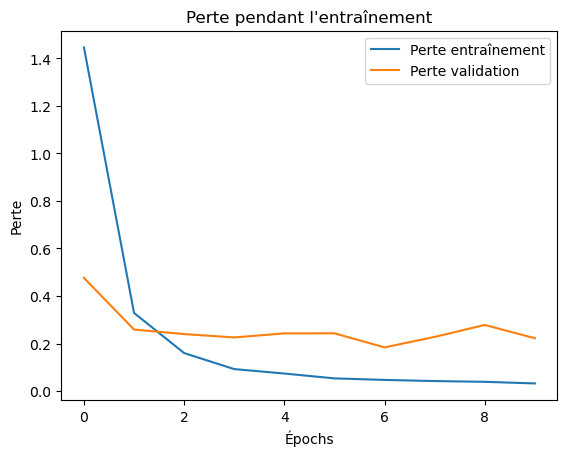

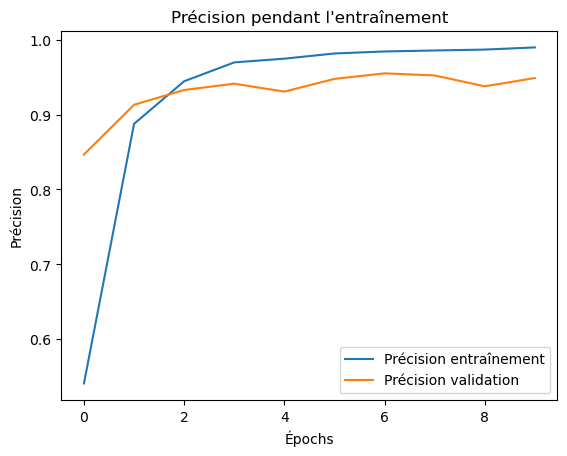

In [14]:
import matplotlib.pyplot as plt

# Tracer la perte au fil des epochs
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Tracer la précision au fil des epochs
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Précision pendant l\'entraînement')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()
plt.show()


Explication des graphiques :
Perte d'entraînement et de validation : Vous pourrez observer si la perte diminue au fil des epochs, ce qui montre que le modèle s'adapte aux données d'entraînement. Si la perte de validation commence à augmenter pendant que la perte d'entraînement diminue, cela indique un overfitting.

Précision d'entraînement et de validation : Vous pourrez voir si la précision sur les données d'entraînement et de validation augmente avec le temps. Idéalement, les deux courbes devraient converger vers des valeurs élevées.

In [19]:
pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 19.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier  # Utiliser SciKeras à la place

# Fonction pour construire le modèle
def build_model(neurons=128, dropout_rate=0.5):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    
    # Couche entièrement connectée avec un nombre de neurones variable
    model.add(layers.Dense(neurons, activation='relu'))
    
    # Ajout d'une couche Dropout avec un taux variable
    model.add(layers.Dropout(dropout_rate))
    
    # Couche de sortie
    model.add(layers.Dense(25, activation='softmax'))
    
    # Compilation du modèle
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Convertir le modèle en un modèle scikit-learn avec SciKeras
model = KerasClassifier(build_fn=build_model)
